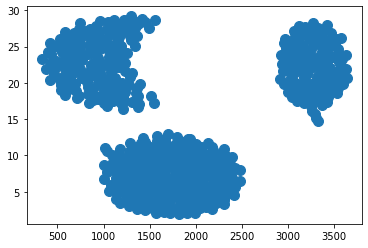

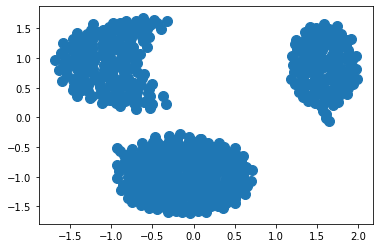

In [64]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def import_dataset():
    with open('cluster.dat') as binary_file:
        data = []
        x = []
        y = []
        for d in binary_file:
            string = d.split()
            x.append(float(string[0]))
            y.append(float(string[1]))
            
    array = np.ndarray(shape=(len(x), 2), dtype=float)

    for i in range(len(x)):
        array[i][0] = x[i]
        array[i][1] = y[i]

    return array

array = import_dataset()

# print(array)

scatter(array[:,0], array[:,1], s=100 ,marker='o')

show()

scaler = StandardScaler()
scaler.fit(array)
scaler.mean_
scaled_data = scaler.transform(array)
scatter(scaled_data[:,0],scaled_data[:,1], s=100 ,marker='o')
show()

[1.57914179 1.56573548]
[-0.67805857 -1.13793637]
[ 0.64512785 -1.15604131]


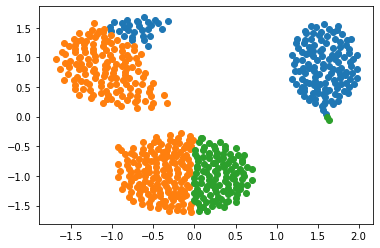

[1.45127083 0.84153766]
[-0.6224625  -0.42580851]
[ 0.2781938  -0.97499186]


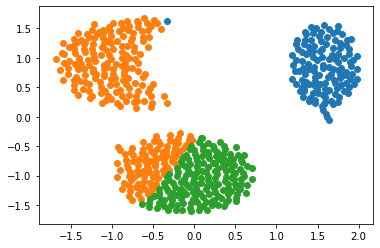

[1.56246297 0.82343272]
[-0.90600245  0.45529883]
[ 0.08360756 -1.04137666]


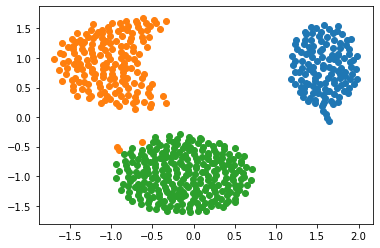

[1.56246297 0.82343272]
[-1.06167144  0.91395744]
[-0.09429986 -0.98706182]


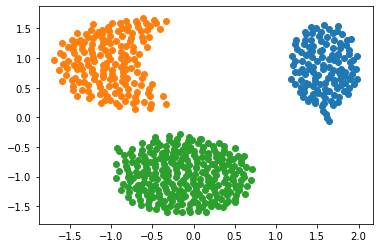

[1.56246297 0.82343272]
[-1.06167144  0.91395744]
[-0.09429986 -0.98706182]


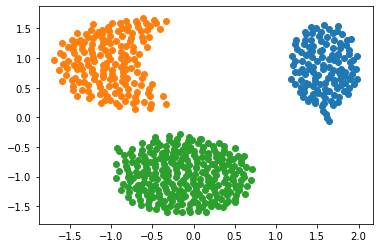

[1.56246297 0.82343272]
[-1.06167144  0.91395744]
[-0.09429986 -0.98706182]


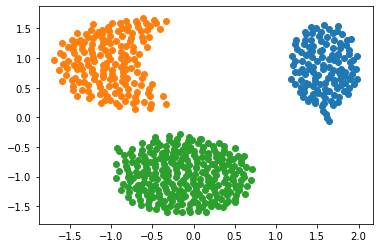

[1.56246297 0.82343272]
[-1.06167144  0.91395744]
[-0.09429986 -0.98706182]


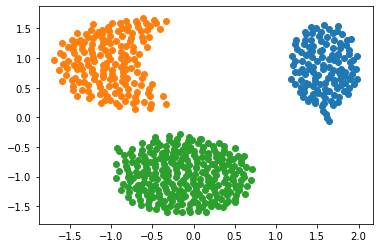

[1.56246297 0.82343272]
[-1.06167144  0.91395744]
[-0.09429986 -0.98706182]


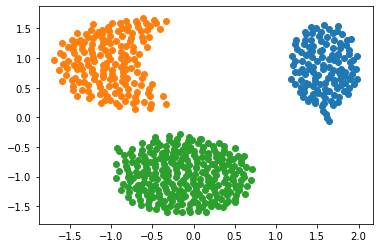

[1.56246297 0.82343272]
[-1.06167144  0.91395744]
[-0.09429986 -0.98706182]


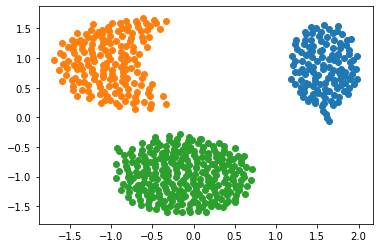

[1.56246297 0.82343272]
[-1.06167144  0.91395744]
[-0.09429986 -0.98706182]


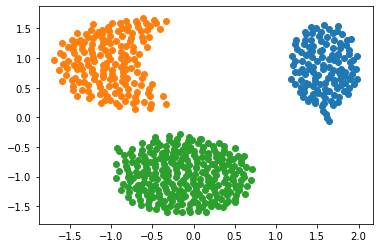

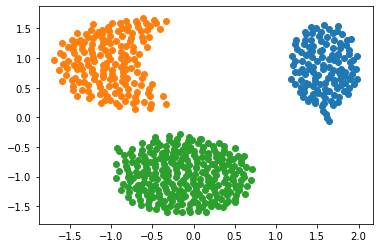

In [87]:
from random import *

def euclideanDistance(p, q):
    x = p[0] - q[0]
    y = p[1] - q[1]
    return np.sqrt((x**2) + (y**2))

# calculate euclidean distances
def getClusterMap(k, centroids, array):
    #initialize cluster_map
    cluster_map = {}
    for i in range(k):
        cluster_map[i] = []
    
    for p in array:
        min_dist = -1
        cluster = -1
        for c in range(len(centroids)):
#             index = centroids.index(c)
            c_xy = centroids[c]
            distance = euclideanDistance(c_xy, p)
            if (min_dist == -1) or (distance < min_dist):
                min_dist = distance
                cluster = c
        cluster_map[cluster].append(p)
    
    return cluster_map

def getNewCentroids(clusterMap):
    new_centroids = []
    for c in clusterMap:
        points = clusterMap[c]
        
        min_sum_dist = -1
#         new_centroid = -1
        for i in range(len(points)):
            sum_dist = 0
            for j in range(len(points)):
                sum_dist += euclideanDistance(points[i], points[j])
                
            if (min_sum_dist == -1) or (sum_dist < min_sum_dist):
                new_centroid = points[i]
                min_sum_dist = sum_dist
        new_centroids.append(new_centroid)
    
    return new_centroids
        
def plotCluster(clusterMap):
    for c in clusterMap:
        points = clusterMap[c]
        array = np.ndarray(shape=(len(points), 2), dtype=float)
        for i in range(len(points)):
            array[i][0] = points[i][0]
            array[i][1] = points[i][1]
            
        plt.scatter(array[:,0], array[:,1])
    plt.show()
    
def printCentroids(k, centroids):
    for i in range(k):
        centroid = centroids[i]
        print(centroid)
    
def kmeans(k, array, n_iter=5):
#     initialize centroids
    centroids = []
    for i in range(k):
        centroid_index = randrange(len(array))
        centroid = array[centroid_index]
        centroids.append(centroid)
        
    # Conseguimos uma lista com 'k' pontos para servirem de centroides iniciais
    for n in range(n_iter):
        # calculamos os clusters 
        printCentroids(k, centroids)
        clusterMap = getClusterMap(k, centroids, array)

        # atualizaremos nossos centroids a partir da media das dist euclid
        centroids = getNewCentroids(clusterMap)
        plotCluster(clusterMap)
    clusterMap = getClusterMap(k, centroids, array)
    
    plotCluster(clusterMap)
    
                
                                    


kmeans(3,scaled_data, 10)
    
    